<a href="https://colab.research.google.com/github/Thienphan0123/InformationAnalysisAndVisualization/blob/main/InformationAnalysisAndVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

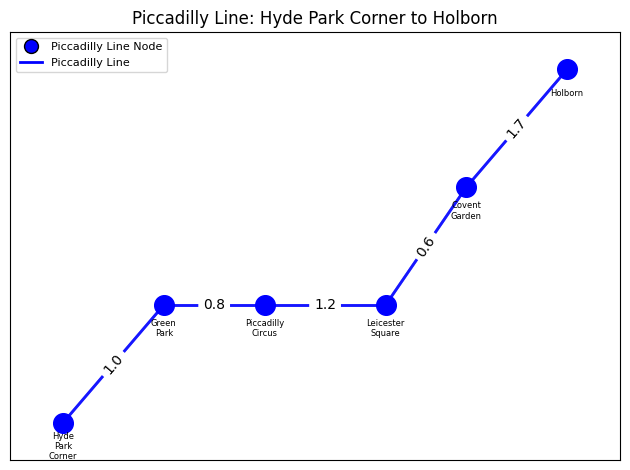

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import matplotlib.lines as lines
import numpy as np

# Coordinates for the Piccadilly line stations from Hyde Park Corner to Holborn
stations = {
    'Hyde Park Corner': (0, 0),
    'Green Park': (1, 1),
    'Piccadilly Circus': (2, 1),
    'Leicester Square': (3.2, 1),
    'Covent Garden': (4, 2),
    'Holborn': (5, 3),
}

# Distance information between stations (in km)
distances = {
    ('Hyde Park Corner', 'Green Park'): 1.0,
    ('Green Park', 'Piccadilly Circus'): 0.8,
    ('Piccadilly Circus', 'Leicester Square'): 1.2,
    ('Leicester Square', 'Covent Garden'): 0.6,
    ('Covent Garden', 'Holborn'): 1.7,
}

# Create a graph object
G = nx.Graph()

# Add nodes with coordinates to the graph
for station, coord in stations.items():
    G.add_node(station, pos=coord)

# Add edges with distances to the graph
for edge, distance in distances.items():
    station1, station2 = edge
    G.add_edge(station1, station2, weight=distance)


# Extract node positions from graph
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='b', node_size=200, alpha=1.0)

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.7, edge_color='b')

# Draw labels (station names)
label_pos = {k: (x, y - 0.2) for k, (x, y) in pos.items()}  # Adjust y-coordinate here
labels = {k: '\n'.join(k.split()) for k in G.nodes()}  # Add newline characters to node labels
nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=6, font_family='sans-serif')

# Add edges with distances and colors to the graph
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance, color='blue')
# Draw edges with assigned colors
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.7, edge_color=edge_colors)

# Adding edge labels (distances)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

# Adding labels and title
plt.title('Piccadilly Line: Hyde Park Corner to Holborn')

# Creating custom legend
handles = []
labels = []

# Node and Line in same entry
def custom_legend_entries():
    legend_elements = []

    # Add legend for Piccadilly Line (Green)
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='blue', label='Piccadilly Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='blue', lw=2, label='Piccadilly Line')
    )
    return legend_elements

# Add custom legend entries for nodes and lines
legend_elements = custom_legend_entries()
plt.legend(handles=legend_elements, loc='best', fontsize=8)
# Removing axis ticks and labels
plt.xticks([])
plt.yticks([])

# Displaying the plot
plt.grid(False)
plt.tight_layout()
plt.show()

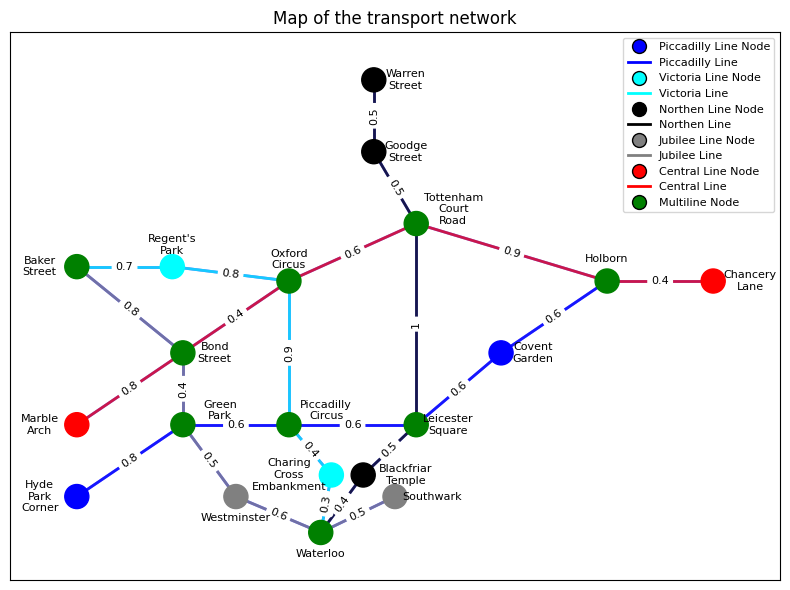

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import matplotlib.lines as lines
import numpy as np

# Coordinates for the stations
stations = {
    'Hyde Park Corner': (0, 0),
    'Green Park': (1, 1),
    'Piccadilly Circus': (2, 1),
    'Leicester Square': (3.2, 1),
    'Covent Garden': (4, 2),
    'Holborn': (5, 3),
    'Bond Street': (1, 2),
    'Baker Street': (0, 3.2),
    'Westminster': (1.5, 0),
    'Waterloo': (2.3, -0.5),
    'Southwark': (3, 0),
    'Tottenham Court Road': (3.2, 3.8),
    'Oxford Circus': (2, 3),
    'Marble Arch': (0, 1),
    'Chancery Lane': (6, 3),
    "Regent's Park": (0.9, 3.2),
    'Charing Cross Embankment': (2.4, 0.3),
    'Blackfriar Temple': (2.7, 0.3),
    'Goodge Street': (2.8, 4.8),
    'Warren Street': (2.8, 5.8),
}

# Distance information between stations (in km)
distances = {
    ('Warren Street', 'Goodge Street'): 0.5,
    ('Goodge Street', 'Tottenham Court Road'): 0.5,
    ('Tottenham Court Road', 'Leicester Square'): 1,
    ('Leicester Square', 'Blackfriar Temple'): 0.5,
    ('Blackfriar Temple', "Waterloo"): 0.4,
    ('Baker Street', "Regent's Park"): 0.7,
    ('Piccadilly Circus', 'Charing Cross Embankment'): 0.4,
    ('Charing Cross Embankment', 'Waterloo'): 0.3,
    ('Oxford Circus', 'Piccadilly Circus'): 0.9,
    ("Regent's Park", 'Oxford Circus'): 0.8,
    ('Holborn', 'Chancery Lane'): 0.4,
    ('Marble Arch', 'Bond Street'): 0.8,
    ('Oxford Circus', 'Bond Street'): 0.4,
    ('Oxford Circus', 'Tottenham Court Road'): 0.6,
    ('Tottenham Court Road', 'Holborn'): 0.9,
    ('Waterloo', 'Southwark'): 0.5,
    ('Green Park', 'Westminster'): 0.5,
    ('Westminster', 'Waterloo'): 0.6,
    ('Baker Street', 'Bond Street'): 0.8,
    ('Bond Street', 'Green Park'): 0.4,
    ('Hyde Park Corner', 'Green Park'): 0.8,
    ('Green Park', 'Piccadilly Circus'): 0.6,
    ('Piccadilly Circus', 'Leicester Square'): 0.6,
    ('Leicester Square', 'Covent Garden'): 0.6,
    ('Covent Garden', 'Holborn'): 0.6,
}

# Define colors for each route based on stations
route_colors = {
    ('Hyde Park Corner', 'Green Park'): 'blue',
    ('Green Park', 'Piccadilly Circus'): 'blue',
    ('Piccadilly Circus', 'Leicester Square'): 'blue',
    ('Leicester Square', 'Covent Garden'): 'blue',
    ('Covent Garden', 'Holborn'): 'blue',
    ('Green Park', 'Westminster'): 'gray',
    ('Westminster', 'Waterloo'): 'gray',
    ('Baker Street', 'Bond Street'): 'gray',
    ('Bond Street', 'Green Park'): 'gray',
    ('Waterloo', 'Southwark'): 'gray',
    ('Marble Arch', 'Bond Street'): 'red',
    ('Oxford Circus', 'Bond Street'): 'red',
    ('Oxford Circus', 'Tottenham Court Road'): 'red',
    ('Tottenham Court Road', 'Holborn'): 'red',
    ('Holborn', 'Chancery Lane'): 'red',
    ('Baker Street', "Regent's Park"): 'cyan',
    ("Regent's Park", 'Oxford Circus'): 'cyan',
    ('Oxford Circus', 'Piccadilly Circus'): 'cyan',
    ('Piccadilly Circus', 'Charing Cross Embankment'): 'cyan',
    ('Charing Cross Embankment', 'Waterloo'): 'cyan',
}

node_colors = {
    'Hyde Park Corner': 'blue',
    'Green Park': 'green',
    'Piccadilly Circus': 'green',
    'Leicester Square': 'green',
    'Covent Garden': 'blue',
    'Holborn': 'green',
    'Bond Street': 'green',
    'Baker Street': 'green',
    'Westminster': 'gray',
    'Waterloo': 'green',
    'Southwark': 'gray',
    'Tottenham Court Road': 'green',
    'Oxford Circus': 'green',
    'Marble Arch': 'red',
    'Chancery Lane': 'red',
    "Regent's Park": 'cyan',
    'Charing Cross Embankment': 'cyan',
    'Blackfriar Temple': 'black',
    'Goodge Street': 'black',
    'Warren Street': 'black',
}

# Create a graph object
G = nx.Graph()

# Add nodes with coordinates to the graph
for station, coord in stations.items():
    G.add_node(station, pos=coord)

# Add edges with distances to the graph
for edge, distance in distances.items():
    station1, station2 = edge
    G.add_edge(station1, station2, weight=distance)

# Plotting the graph
plt.figure(figsize=(8, 6))

# Extract node positions from graph
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
node_color_list = [node_colors.get(node, 'white') for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_color_list, node_size=300, alpha=1.0)


# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.7, edge_color='b')

# Draw labels (station names)
label_pos = {}
for node, (x, y) in pos.items():
    if node in ['Warren Street', 'Goodge Street', 'Leicester Square', 'Covent Garden', 'Bond Street' ]:  # Nodes you want to push to the right
        label_pos[node] = (x + 0.3, y)  # Adjust x-coordinate to push to the right
    elif node in ['Southwark', 'Chancery Lane' ]:
        label_pos[node] = (x + 0.35, y)  # Adjust x-coordinate to push to the right
    elif node in ['Baker Street', 'Marble Arch', 'Hyde Park Corner']:
        label_pos[node] = (x - 0.35, y)
    elif node in ["Regent's Park", 'Bond Street', 'Oxford Circus', 'Holborn']:
        label_pos[node] = (x, y + 0.3)
    elif node in ['Tottenham Court Road', 'Piccadilly Circus', 'Green Park']:
        label_pos[node] = (x + 0.35, y + 0.2)
    elif node in ['Westminster', 'Waterloo']:
        label_pos[node] = (x, y - 0.3)
    elif node in ['Charing Cross Embankment']:
        label_pos[node] = (x - 0.4, y)
    elif node in ['Blackfriar Temple']:
        label_pos[node] = (x + 0.4, y)
    else:
        label_pos[node] = (x, y)  # Default position
labels = {k: '\n'.join(k.split()) for k in G.nodes()}  # Add newline characters to node labels
nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=8, font_family='sans-serif')

# Add edges with distances and colors to the graph
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance, color=route_colors.get((station1, station2), 'black'))
# Draw edges with assigned colors
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.7, edge_color=edge_colors)

# Adding edge labels (distances)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

# Adding labels and title
plt.title('Map of the transport network')

# Creating custom legend
handles = []
labels = []

# Node and Line in same entry
def custom_legend_entries():
    legend_elements = []

    # Add legend for Piccadilly Line (Green)
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='blue', label='Piccadilly Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='blue', lw=2, label='Piccadilly Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='cyan', label='Victoria Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='cyan', lw=2, label='Victoria Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='black', label='Northen Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='black', lw=2, label='Northen Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='gray', label='Jubilee Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='gray', lw=2, label='Jubilee Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='red', label='Central Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='red', lw=2, label='Central Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='green', label='Multiline Node', linestyle='')
    )
    return legend_elements

# Add custom legend entries for nodes and lines
legend_elements = custom_legend_entries()
plt.legend(handles=legend_elements, loc='best', fontsize=8)
# Removing axis ticks and labels
plt.xticks([])
plt.yticks([])
# Displaying the plot
plt.grid(False)
plt.tight_layout()
plt.show()

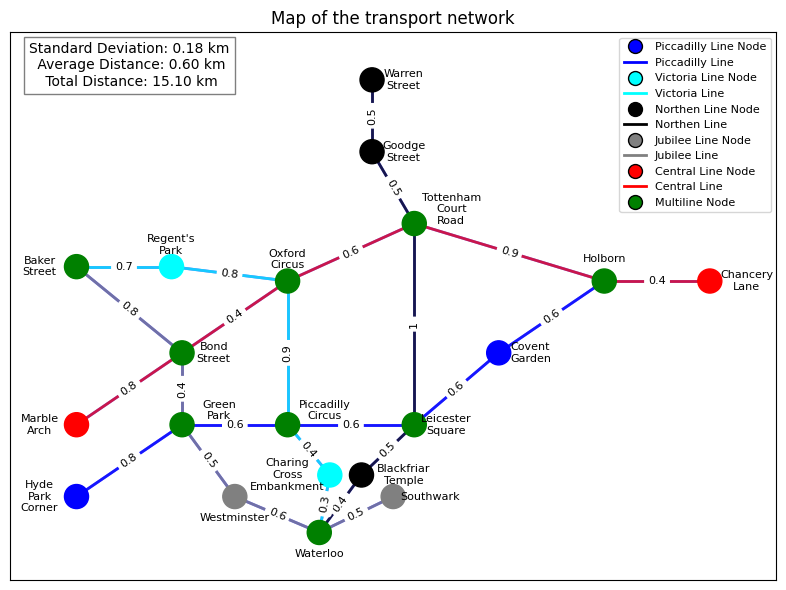

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import matplotlib.lines as lines
import numpy as np

# Coordinates for the stations
stations = {
    'Hyde Park Corner': (0, 0),
    'Green Park': (1, 1),
    'Piccadilly Circus': (2, 1),
    'Leicester Square': (3.2, 1),
    'Covent Garden': (4, 2),
    'Holborn': (5, 3),
    'Bond Street': (1, 2),
    'Baker Street': (0, 3.2),
    'Westminster': (1.5, 0),
    'Waterloo': (2.3, -0.5),
    'Southwark': (3, 0),
    'Tottenham Court Road': (3.2, 3.8),
    'Oxford Circus': (2, 3),
    'Marble Arch': (0, 1),
    'Chancery Lane': (6, 3),
    "Regent's Park": (0.9, 3.2),
    'Charing Cross Embankment': (2.4, 0.3),
    'Blackfriar Temple': (2.7, 0.3),
    'Goodge Street': (2.8, 4.8),
    'Warren Street': (2.8, 5.8),
}

# Distance information between stations (in km)
distances = {
    ('Warren Street', 'Goodge Street'): 0.5,
    ('Goodge Street', 'Tottenham Court Road'): 0.5,
    ('Tottenham Court Road', 'Leicester Square'): 1,
    ('Leicester Square', 'Blackfriar Temple'): 0.5,
    ('Blackfriar Temple', "Waterloo"): 0.4,
    ('Baker Street', "Regent's Park"): 0.7,
    ('Piccadilly Circus', 'Charing Cross Embankment'): 0.4,
    ('Charing Cross Embankment', 'Waterloo'): 0.3,
    ('Oxford Circus', 'Piccadilly Circus'): 0.9,
    ("Regent's Park", 'Oxford Circus'): 0.8,
    ('Holborn', 'Chancery Lane'): 0.4,
    ('Marble Arch', 'Bond Street'): 0.8,
    ('Oxford Circus', 'Bond Street'): 0.4,
    ('Oxford Circus', 'Tottenham Court Road'): 0.6,
    ('Tottenham Court Road', 'Holborn'): 0.9,
    ('Waterloo', 'Southwark'): 0.5,
    ('Green Park', 'Westminster'): 0.5,
    ('Westminster', 'Waterloo'): 0.6,
    ('Baker Street', 'Bond Street'): 0.8,
    ('Bond Street', 'Green Park'): 0.4,
    ('Hyde Park Corner', 'Green Park'): 0.8,
    ('Green Park', 'Piccadilly Circus'): 0.6,
    ('Piccadilly Circus', 'Leicester Square'): 0.6,
    ('Leicester Square', 'Covent Garden'): 0.6,
    ('Covent Garden', 'Holborn'): 0.6,
}

# Define colors for each route based on stations
route_colors = {
    ('Hyde Park Corner', 'Green Park'): 'blue',
    ('Green Park', 'Piccadilly Circus'): 'blue',
    ('Piccadilly Circus', 'Leicester Square'): 'blue',
    ('Leicester Square', 'Covent Garden'): 'blue',
    ('Covent Garden', 'Holborn'): 'blue',
    ('Green Park', 'Westminster'): 'gray',
    ('Westminster', 'Waterloo'): 'gray',
    ('Baker Street', 'Bond Street'): 'gray',
    ('Bond Street', 'Green Park'): 'gray',
    ('Waterloo', 'Southwark'): 'gray',
    ('Marble Arch', 'Bond Street'): 'red',
    ('Oxford Circus', 'Bond Street'): 'red',
    ('Oxford Circus', 'Tottenham Court Road'): 'red',
    ('Tottenham Court Road', 'Holborn'): 'red',
    ('Holborn', 'Chancery Lane'): 'red',
    ('Baker Street', "Regent's Park"): 'cyan',
    ("Regent's Park", 'Oxford Circus'): 'cyan',
    ('Oxford Circus', 'Piccadilly Circus'): 'cyan',
    ('Piccadilly Circus', 'Charing Cross Embankment'): 'cyan',
    ('Charing Cross Embankment', 'Waterloo'): 'cyan',
}

node_colors = {
    'Hyde Park Corner': 'blue',
    'Green Park': 'green',
    'Piccadilly Circus': 'green',
    'Leicester Square': 'green',
    'Covent Garden': 'blue',
    'Holborn': 'green',
    'Bond Street': 'green',
    'Baker Street': 'green',
    'Westminster': 'gray',
    'Waterloo': 'green',
    'Southwark': 'gray',
    'Tottenham Court Road': 'green',
    'Oxford Circus': 'green',
    'Marble Arch': 'red',
    'Chancery Lane': 'red',
    "Regent's Park": 'cyan',
    'Charing Cross Embankment': 'cyan',
    'Blackfriar Temple': 'black',
    'Goodge Street': 'black',
    'Warren Street': 'black',
}

# Create a graph object
G = nx.Graph()

# Add nodes with coordinates to the graph
for station, coord in stations.items():
    G.add_node(station, pos=coord)

# Add edges with distances to the graph
for edge, distance in distances.items():
    station1, station2 = edge
    G.add_edge(station1, station2, weight=distance)

# Plotting the graph
plt.figure(figsize=(8, 6))

# Extract node positions from graph
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
node_color_list = [node_colors.get(node, 'white') for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_color_list, node_size=300, alpha=1.0)


# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.7, edge_color='b')

# Draw labels (station names)
label_pos = {}
for node, (x, y) in pos.items():
    if node in ['Warren Street', 'Goodge Street', 'Leicester Square', 'Covent Garden', 'Bond Street' ]:  # Nodes you want to push to the right
        label_pos[node] = (x + 0.3, y)  # Adjust x-coordinate to push to the right
    elif node in ['Southwark', 'Chancery Lane' ]:
        label_pos[node] = (x + 0.35, y)  # Adjust x-coordinate to push to the right
    elif node in ['Baker Street', 'Marble Arch', 'Hyde Park Corner']:
        label_pos[node] = (x - 0.35, y)
    elif node in ["Regent's Park", 'Bond Street', 'Oxford Circus', 'Holborn']:
        label_pos[node] = (x, y + 0.3)
    elif node in ['Tottenham Court Road', 'Piccadilly Circus', 'Green Park']:
        label_pos[node] = (x + 0.35, y + 0.2)
    elif node in ['Westminster', 'Waterloo']:
        label_pos[node] = (x, y - 0.3)
    elif node in ['Charing Cross Embankment']:
        label_pos[node] = (x - 0.4, y)
    elif node in ['Blackfriar Temple']:
        label_pos[node] = (x + 0.4, y)
    else:
        label_pos[node] = (x, y)  # Default position
labels = {k: '\n'.join(k.split()) for k in G.nodes()}  # Add newline characters to node labels
nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=8, font_family='sans-serif')

# Add edges with distances and colors to the graph
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance, color=route_colors.get((station1, station2), 'black'))
# Draw edges with assigned colors
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.7, edge_color=edge_colors)

# Adding edge labels (distances)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

# Adding labels and title
plt.title('Map of the transport network')

# Creating custom legend
handles = []
labels = []

# Node and Line in same entry
def custom_legend_entries():
    legend_elements = []

    # Add legend for Piccadilly Line (Green)
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='blue', label='Piccadilly Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='blue', lw=2, label='Piccadilly Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='cyan', label='Victoria Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='cyan', lw=2, label='Victoria Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='black', label='Northen Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='black', lw=2, label='Northen Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='gray', label='Jubilee Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='gray', lw=2, label='Jubilee Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='red', label='Central Line Node', linestyle='')
    )
    legend_elements.append(
        lines.Line2D([0, 1], [0, 0], color='red', lw=2, label='Central Line')
    )
    legend_elements.append(
        lines.Line2D([0], [0], color='black', marker='o', markersize=10, markerfacecolor='green', label='Multiline Node', linestyle='')
    )
    return legend_elements

# Add custom legend entries for nodes and lines
legend_elements = custom_legend_entries()
plt.legend(handles=legend_elements, loc='best', fontsize=8)
# Removing axis ticks and labels
plt.xticks([])
plt.yticks([])
numbers = [0.8, 0.6, 0.6, 0.6, 0.6, 0.4, 0.8, 0.4, 0.6, 0.9, 0.7, 0.8, 0.9, 0.4, 0.3, 0.8, 0.4, 0.5, 0.6, 0.5, 0.4, 0.5, 1, 0.5, 0.5]
total = 0
for num in numbers:
    total += num
average_length_line = np.average(numbers)
sd_length_line = np.std(numbers)
plt.text(0.5, 6, f'Standard Deviation: {sd_length_line:.2f} km\n Average Distance: {average_length_line:.2f} km\n Total Distance: {total:.2f} km', horizontalalignment='center', verticalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
# Displaying the plot
plt.grid(False)
plt.tight_layout()
plt.show()